<a href="https://colab.research.google.com/github/fjoseph631/Machine-Learning/blob/master/Problem_3_HW2AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the CIFAR10 data set

In [1]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

from keras.preprocessing import image



## Randomly augmented images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_datagen = ImageDataGenerator(
    
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
train_generator = train_datagen.flow(train_images,
    train_labels,
    batch_size=32,
   
)

validation_datagen = ImageDataGenerator()

validation_generator = validation_datagen.flow(
    test_images,
    test_labels,
    batch_size=32,
)


In [10]:
from keras import layers
from keras import models
from keras import optimizers
from keras.applications import VGG16
import numpy as np
model = models.Sequential()


## Underfit Model


In [0]:
model = models.Sequential()
# conv layers
# 1
model.add(layers.Conv2D(2, (3, 3), activation='relu',input_shape=(32,32, 3,)))
model.add(layers.MaxPooling2D(2, 2))
"""# 3
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
# 4
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
"""
# dense layers
model.add(layers.Flatten())
# DROPOUT
"""model.add(layers.Dropout(0.1))
model.add(layers.Dense(256, activation='relu'))"""
model.add(layers.Dense(10, activation='softmax'))


## Overfit Model



In [0]:
model = models.Sequential()
# conv layers
# 1
model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(32,32, 3,)))
model.add(layers.MaxPooling2D(2, 2))
# 3
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
# 4
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# dense layers
model.add(layers.Flatten())
# DROPOUT
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

##Proper Fit Model

In [0]:
model = models.Sequential()
# conv layers
# 1
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(32,32, 3,)))
model.add(layers.MaxPooling2D(2, 2))
# 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
# 4
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
# dense layers
model.add(layers.Flatten())
# DROPOUT
model.add(layers.Dropout(0.1))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Training the convnet using data-augmentation generators

In [20]:


model.compile(
    loss='binary_crossentropy', 
    optimizer='rmsprop', 
    metrics=['acc'])
model.summary()
history = model.fit_generator(
    train_generator,
    steps_per_epoch=1000,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=500
)
                    

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 2)         56        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 2)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 450)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                4510      
Total params: 4,566
Trainable params: 4,566
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10





1000/1000 [==============================] - 31s 31ms/step - loss: 2.8787 - acc: 0.8204 - val_loss: 2.8888 - val_acc: 0.8198
Epoch 2/10
1000/1000 [==============================] - 31s 31ms/step - loss: 2.8861 - acc: 0.8198 - val_loss

##Training the covenet with regular data

In [22]:

model.compile(
    loss='binary_crossentropy', 
    optimizer='rmsprop', 
    metrics=['acc'])
model.summary()

epochs = 6
history = model.fit(train_images,
                    train_labels,
                    epochs=epochs, 
                    batch_size=32, 
                    validation_data=(test_images, test_labels))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 2)         56        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 2)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 450)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                4510      
Total params: 4,566
Trainable params: 4,566
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 23s 456us/step - loss: 2.8854 - acc: 0.8200 - val_loss: 2.8854 - val_acc: 0.8200
Epoch 2/6
50000/50000 [==============================] - 22s 4

## Display curves of loss and accuracy during training

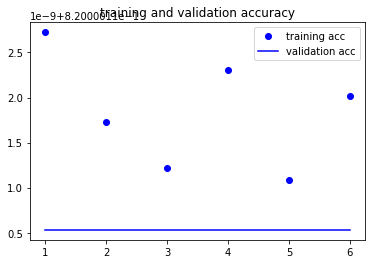

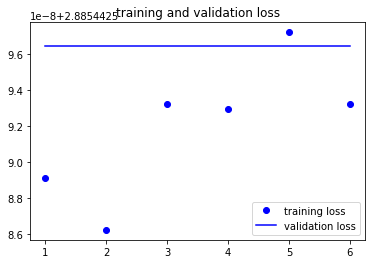

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()